In [1]:
!pip install nltk

In [12]:
import nltk
import time
import matplotlib.pyplot as plt
from nltk.corpus import reuters
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# Step 3: Define the SPIMI class (Same as before)

from collections import defaultdict
import re

class SPIMI:
    def __init__(self):
        # Inverted index to store terms and their associated document IDs
        self.inverted_index = defaultdict(list)

    def add_document(self, doc_id, content):
        """
        Processes a single document and adds its terms to the inverted index.
        :param doc_id: Document ID or name
        :param content: Text content of the document
        """
        # Tokenize the document content into terms
        terms = self.tokenize(content)

        # Add each term to the inverted index with the document ID
        for term in terms:
            if doc_id not in self.inverted_index[term]:
                self.inverted_index[term].append(doc_id)

    def tokenize(self, text):
        """
        Tokenizes the input text into terms (words).
        :param text: Document content to tokenize
        :return: List of terms
        """
        # Basic tokenization: lowercasing and removing non-alphanumeric characters
        return re.findall(r'\b\w+\b', text.lower())

    def write_block(self, block_id):
        """
        Writes the current inverted index to a disk or a file.
        :param block_id: Block identifier to distinguish output files.
        """
        # Save the inverted index to a file (e.g., block_{block_id}.txt)
        with open(f'block_{block_id}.txt', 'w') as f:
            for term, postings in sorted(self.inverted_index.items()):
                f.write(f"{term}: {', '.join(postings)}\n")

    def clear(self):
        """ Clears the current in-memory index. """
        self.inverted_index.clear()

Block size: 20, Time taken: 0.008883476257324219 seconds
Block size: 40, Time taken: 0.017851829528808594 seconds
Block size: 80, Time taken: 0.026410818099975586 seconds
Block size: 160, Time taken: 0.05097007751464844 seconds
Block size: 320, Time taken: 0.13548493385314941 seconds
Block size: 640, Time taken: 0.3508014678955078 seconds
Block size: 1280, Time taken: 0.787635326385498 seconds
Block size: 2560, Time taken: 2.015481472015381 seconds
Block size: 5120, Time taken: 6.073787689208984 seconds
Block size: 10240, Time taken: 27.989078760147095 seconds


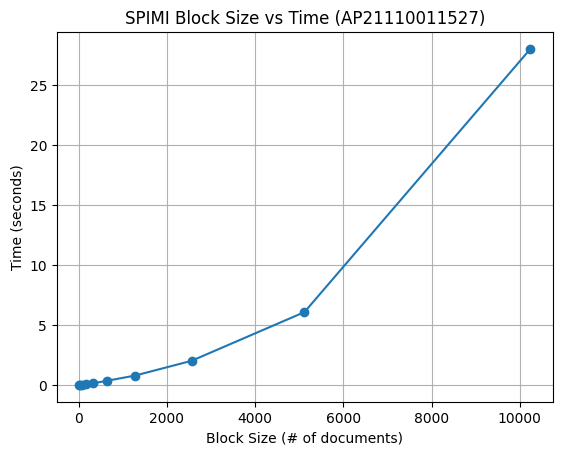

In [20]:
# Step 4: Load Reuters dataset
from nltk.corpus import reuters
import time
import matplotlib.pyplot as plt

# Get document IDs
document_ids = reuters.fileids()

# Read all documents
documents_reuters = [(doc_id, reuters.raw(doc_id)) for doc_id in document_ids]

# Initialize SPIMI instance
spimi = SPIMI()

# Variables for storing block sizes and times
block_sizes_reuters = []
times_reuters = []

# Step 5: Run SPIMI Algorithm for Task 01
block_size_reuters = 20  # Start with 20 documents
block_id = 1

while block_size_reuters <= len(documents_reuters):
    # Select subset of documents for the current block
    doc_block_reuters = documents_reuters[:block_size_reuters]

    # Measure the time taken to process the block
    start_time_reuters = time.time()

    # Process each document in the block
    for doc_id, content in doc_block_reuters:
        spimi.add_document(doc_id, content)

    # Write the block to disk (this simulates storing the inverted index)
    spimi.write_block(block_id)

    # Clear the in-memory index for the next block
    spimi.clear()

    end_time_reuters = time.time()

    # Log block size and time taken
    block_sizes_reuters.append(block_size_reuters)
    times_reuters.append(end_time_reuters - start_time_reuters)

    # Print progress
    print(f"Block size: {block_size_reuters}, Time taken: {end_time_reuters - start_time_reuters} seconds")

    # Double the block size for the next run
    block_size_reuters *= 2
    block_id += 1

# Step 6: Plot block size vs time taken
plt.plot(block_sizes_reuters, times_reuters, marker='o')
plt.title('SPIMI Block Size vs Time (AP21110011527)')
plt.xlabel('Block Size (# of documents)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()


Block size: 10, Time taken: 0.012174129486083984 seconds
Block size: 20, Time taken: 0.01505422592163086 seconds
Block size: 40, Time taken: 0.030265331268310547 seconds
Block size: 80, Time taken: 0.049404144287109375 seconds
Block size: 160, Time taken: 0.2726569175720215 seconds
Block size: 320, Time taken: 0.5551567077636719 seconds
Block size: 640, Time taken: 1.2390515804290771 seconds


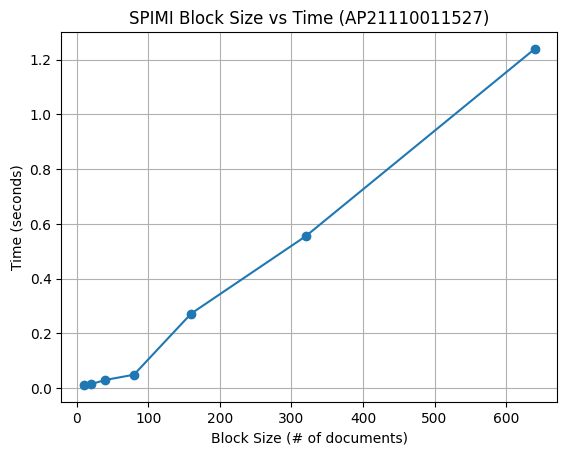

In [21]:
import os
from glob import glob
import time
import matplotlib.pyplot as plt

# Step 7: Load D1 Dataset (Kaggle dataset)
dataset_path = '/content/drive/MyDrive/archive (6)'  # Path to the dataset after fetching via Kaggle
document_paths = glob(os.path.join(dataset_path, '**/*.txt'), recursive=True)

# Read content of the first 1000 documents
documents_d1 = []
for doc_path in document_paths[:1000]:
    with open(doc_path, 'r', encoding='utf-8') as file:
        documents_d1.append((os.path.basename(doc_path), file.read()))  # (doc_id, content)

# Initialize SPIMI instance
spimi = SPIMI()

# Variables for storing block sizes and times
block_sizes_d1 = []
times_d1 = []

# Step 8: Run SPIMI Algorithm for Task 02
block_size_d1 = 10  # Start with 10 documents
block_id = 1

while block_size_d1 <= len(documents_d1):
    # Select subset of documents for the current block
    doc_block_d1 = documents_d1[:block_size_d1]

    # Measure the time taken to process the block
    start_time_d1 = time.time()

    # Process each document in the block
    for doc_id, content in doc_block_d1:
        spimi.add_document(doc_id, content)

    # Write the block to disk (this simulates storing the inverted index)
    spimi.write_block(block_id)

    # Clear the in-memory index for the next block
    spimi.clear()

    end_time_d1 = time.time()

    # Log block size and time taken
    block_sizes_d1.append(block_size_d1)
    times_d1.append(end_time_d1 - start_time_d1)

    # Print progress
    print(f"Block size: {block_size_d1}, Time taken: {end_time_d1 - start_time_d1} seconds")

    # Double the block size for the next run
    block_size_d1 *= 2
    block_id += 1

# Step 9: Plot block size vs time taken
plt.plot(block_sizes_d1, times_d1, marker='o')
plt.title('SPIMI Block Size vs Time (AP21110011527)')
plt.xlabel('Block Size (# of documents)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()
